In [1]:
%load_ext autoreload
%autoreload 2
%autosave 0

from numpy import linspace
from pandas import DataFrame

from etl import kaggle, rivm
from contagion import *

Autosave disabled


In [2]:
window = linspace(1, 0.1, 14)
window = [ x / sum(window) for x in window ]
window = [ round(x, 3) for x in window ]
window

[0.13,
 0.121,
 0.112,
 0.103,
 0.094,
 0.085,
 0.076,
 0.067,
 0.058,
 0.049,
 0.04,
 0.031,
 0.022,
 0.013]

In [3]:
cprob, ctime = 0.05, 5

real = rivm()
cases = real['confirmed'].shift(-ctime, freq='D').dropna() / cprob
cases.diff().tail()

2020-03-22    23660.0
2020-03-23    19780.0
2020-03-24    14640.0
2020-03-25    12480.0
2020-03-26     2000.0
Freq: D, Name: confirmed, dtype: float64

In [85]:
kw = dict()
kw['beta'] = 10
kw['fatal'] = 0.1
kw['ilag'] = 4
kw['qlag'] = 7
kw['size'] = 17_400_000

self = Contagion(window, **kw)
data = DataFrame(self(cases, 60)).astype(int)
data.tail()

,deceased,exposed,infectious,quarantined,recovered,susceptible,vaccinated
55,51189,8586,9422,23331,460709,16846760,0
56,51390,9358,10206,21831,462518,16844693,0
57,51591,10527,10460,20614,464321,16842485,0
58,51807,11836,10004,19825,466264,16840261,0
59,52048,12989,8872,19473,468437,16838179,0


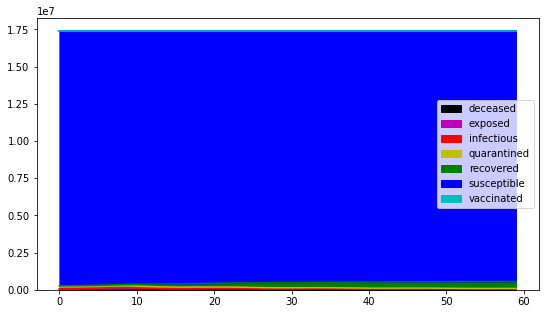

In [86]:
data.plot.area(figsize=(9,5), color='kmrygbc')